In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sklearn
import mlxtend

In [2]:
# Cargmaos el dataset a un DataFrame de pandas
dfdata = pd.read_csv("diabetes.csv")

In [3]:
# Imprimimos la cabecera
dfdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Imprimimos la cola
dfdata.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
X = dfdata.drop(labels='Outcome', axis = 1)
Y = dfdata.Outcome

In [6]:
# Verificamos la cantidad de datos por cada columna
dfdata.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [7]:
# Verificamos si hay datos nulos
dfdata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Revisamos la estadística descriptiva del dataset
dfdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
labels = ['Sano','Diabetes']
labels

['Sano', 'Diabetes']

In [10]:
# Dividimos el dataset en datos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print('xtrain: {} ytrain: {} xtest: {} ytest: {}'.format(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape))

xtrain: (614, 8) ytrain: (614,) xtest: (154, 8) ytest: (154,)


Random Forest

In [11]:
# Creamos un modelo de RandomForest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 49,
                                 random_state = 45,
                                 min_samples_leaf = 15)

In [12]:
# Ajustamos el modelo con los datos de entrenamiento
RF_model.fit(xtrain,ytrain)

,n_estimators,49
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0     0.7864    0.8182    0.8020        99
           1     0.6471    0.6000    0.6226        55

    accuracy                         0.7403       154
   macro avg     0.7167    0.7091    0.7123       154
weighted avg     0.7366    0.7403    0.7379       154



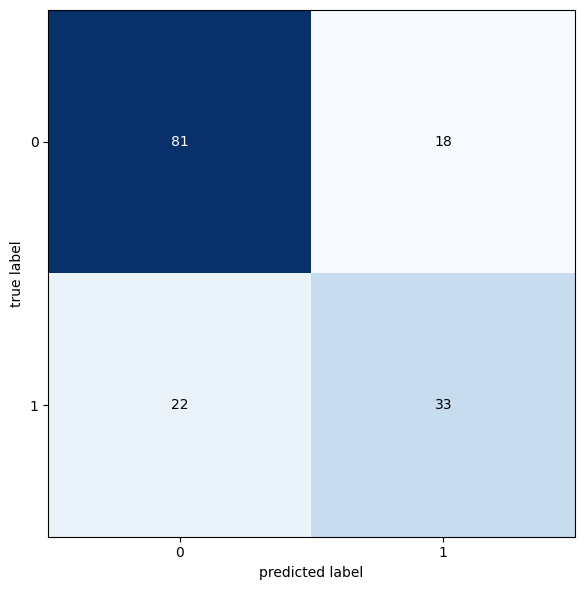

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Calculamos las salidas de predicción con los datos de test
ypred = RF_model.predict(xtest)

# Usando la salida esperada y la salida de predicción calculamos la matriz de confusión
matriz = confusion_matrix(ytest,ypred)

# Graficamos la matriz de confusión
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

# Imprimimos el resumen de métricas del modelo
print(metrics.classification_report(ytest,ypred, digits = 4))


In [ ]:
## prueba de nuevo registro ingresado
nuevo_registro = pd.DataFrame([{
    "Pregnancies": 2,
    "Glucose": 120,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 85,
    "BMI": 28.5,
    "DiabetesPedigreeFunction": 0.45,
    "Age": 33
}])

# Clasificar con el modelo entrenado
prediccion = RF_model.predict(nuevo_registro)
probabilidad = RF_model.predict_proba(nuevo_registro)

print("Predicción (0 = No Diabetes, 1 = Diabetes):", prediccion[0])
print("Probabilidad [No Diabetes, Diabetes]:", probabilidad[0])

Predicción (0 = No Diabetes, 1 = Diabetes): 0
Probabilidad [No Diabetes, Diabetes]: [0.6748293 0.3251707]
